# Tree Experiments

Example notebook for exploring two topics related to decision trees:
* methods for generating visual representations of decision trees in Python.
* the influence of hyperparameters on tree building, including aspects such as accuracy, tree size, and overfitting

Ricardo Almeida, based on [Visualize a Decision Tree in 4 Ways with Scikit-Learn and Python](https://mljar.com/blog/visualize-decision-tree/) by Piotr Płoński

In [1]:
# Additional requirements
# pip install dtreeviz

### Training and Visualization

In [2]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split

In [3]:
RANDOM_SEED = 7657

TEST_SIZE=0.20

Prepare the data

In [4]:
iris = datasets.load_iris()

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
X = iris.data
y = iris.target

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=RANDOM_SEED, test_size=TEST_SIZE)

Decide on model parameters

In [10]:
MAX_DEPTH = 3
MIN_SAMPLES_LEAF = 1
MIN_SAMPLE_SPLIT = 2

Fit the model

In [11]:
model = DecisionTreeClassifier(random_state=RANDOM_SEED,
                               max_depth=MAX_DEPTH,
                               min_samples_leaf=MIN_SAMPLES_LEAF,
                               min_samples_split=MIN_SAMPLE_SPLIT)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=7657)

Check performance

In [12]:
accuracy_train = model.score(X_train, y_train)*100
accuracy_test  = model.score(X_test, y_test)*100

print("Accuracy on train set:  {:.1f}%".format(accuracy_train))
print("Accuracy on test  set:  {:.1f}%".format(accuracy_test))

Accuracy on train set:  97.5%
Accuracy on test  set:  96.7%


#### 1. Visualization: as text

In [13]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_3 <= 0.75
|   |--- class: 0
|--- feature_3 >  0.75
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: 1
|   |   |--- feature_2 >  4.95
|   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- class: 2



#### 2. Visualization: matplotlib

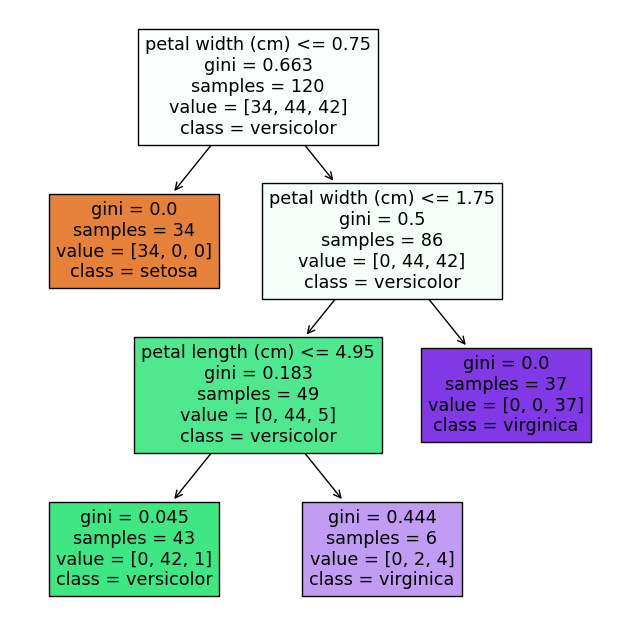

In [14]:
fig = plt.figure(figsize=(8,8))
_ = tree.plot_tree(model, 
                   feature_names=iris.feature_names,  
                   class_names=list(iris.target_names),
                   filled=True)

#### 3. Visualization: graphviz

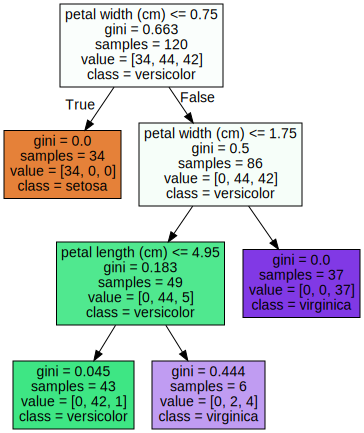

In [15]:
import graphviz

dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

#### 4. Visualization: dtreeviz

In [16]:
import dtreeviz.trees

In [17]:
viz = dtreeviz.model(model, X_train, y_train,
                target_name="target",
                feature_names=iris.feature_names,
                class_names=list(iris.target_names))

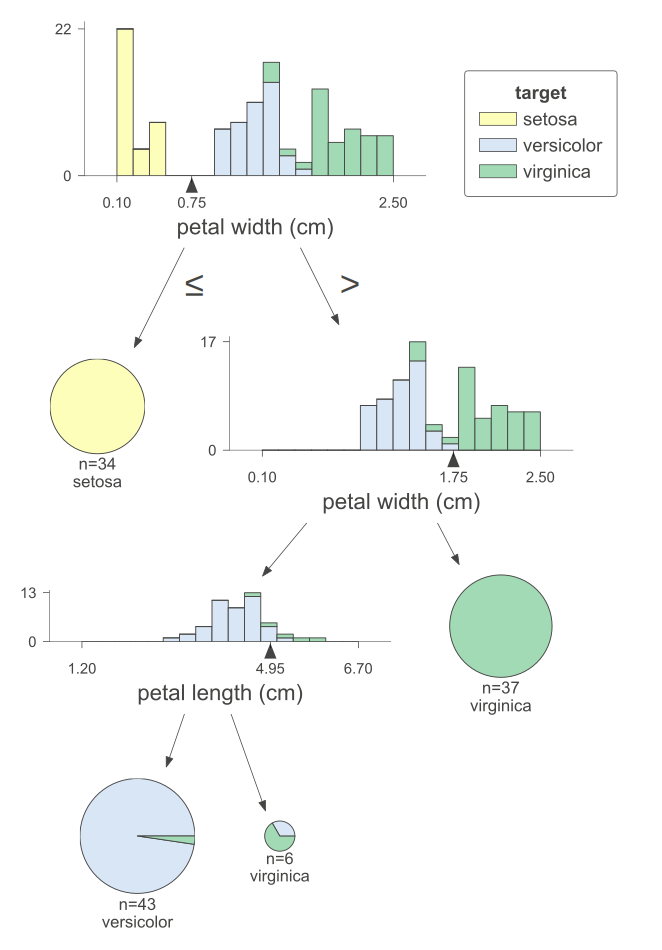

In [18]:
viz.view(scale=2.5)